## Sprawozdanie3

**Data:** 2024-05-26  
**Autor:** Piotr Szepietowski

## Wykorzystywane dalej biblioteki zewnętrzne Pythona

    - Numpy
    - matplotlib
    - scipy

## Zadanie 1
Zadaniem jest zaimplementowanie metody potegowej do wyznaczenia współczynnika uwarunkowania macierzy, powinna być funkcją przyjmującą macierz a zwracającą

    - wyliczony współczynnik
    - współczynnik z wbudowanej fukcji
    - różnicę metod

## Implementacja metody Potegowej

Metoda zaimplementowana została jako funkcja power_method_cond(), przyjmująca pewną macierz A, oraz opcjonalne parametry tol (odpowiadający za wartość graniczną wyznaczającą zbieżność) oraz max_iter (wyznaczającą maksymalną liczbę iteracji).$\newline$
Zwraca ona wynik dla funkcji potęgowej, funkcji wbudowanej oraz różnicę między wynikami.$\newline$
Przy obliczaniu wartości własnych wykorzystuje iloraz Rayleigha.$\newline$
Pochodzącej z scipy funkcji solve (rozwiązującej układ równań) używa aby zaimplementować odwrotną metodę potęgową w celu usprawnienia obliczeń. Dzięki tym usprawnieniom udało się również zminimalizować problemy zdziałaniami dla macierzy nie zdiagonalizowanych.

In [24]:
import numpy as np
from scipy.linalg import solve

def power_method_cond(A, tol=1e-10, max_iter=1000):
    n = A.shape[0]
    
    try:
        test_vec = np.ones(n)
        solve(A, test_vec)
    except np.linalg.LinAlgError:
        return np.inf, np.inf, 0.0
    
    ATA = A.T @ A
    b_k = np.random.rand(n)
    b_k = b_k / np.linalg.norm(b_k)
    
    lambda_max_prev = 0
    for i in range(max_iter):
        Ab_k = ATA @ b_k
        lambda_max = np.dot(b_k, Ab_k)
        b_k_next = Ab_k / np.linalg.norm(Ab_k)
        
        if abs(lambda_max - lambda_max_prev) < tol:
            break
            
        lambda_max_prev = lambda_max
        b_k = b_k_next
    
    sigma_max = np.sqrt(lambda_max)
    
    c_k = np.random.rand(n)
    c_k = c_k / np.linalg.norm(c_k)
    
    lambda_min_prev = np.inf
    for i in range(max_iter):
        try:
            y = solve(ATA, c_k)
        except np.linalg.LinAlgError:
            return np.inf, np.inf, 0.0
            
        lambda_min_inv = np.dot(c_k, y)
        
        if lambda_min_inv == 0:
            return np.inf, np.inf, 0.0
            
        lambda_min = 1.0 / lambda_min_inv
        c_k_next = y / np.linalg.norm(y)
        if abs(lambda_min - lambda_min_prev) < tol:
            break
            
        lambda_min_prev = lambda_min
        c_k = c_k_next
    
    sigma_min = np.sqrt(lambda_min)
    cond_power = sigma_max / sigma_min
    cond_builtin = np.linalg.cond(A)
    diff = abs(cond_power - cond_builtin)
    
    return cond_power, cond_builtin, diff

A = np.array([[2, 1], [1, 3]])
cond_power, cond_builtin, diff = power_method_cond(A)
print("Współczynnik uwarunkowania (metoda potęgowa):", cond_power)
print("Współczynnik uwarunkowania (wbudowana funkcja):", cond_builtin)
print("Różnica:", diff)

A = np.random.rand(10, 10)
cond_power, cond_builtin, diff = power_method_cond(A)
print("Współczynnik uwarunkowania (metoda potęgowa):", cond_power)
print("Współczynnik uwarunkowania (wbudowana funkcja):", cond_builtin)
print("Różnica:", diff)

Współczynnik uwarunkowania (metoda potęgowa): 2.6180339887498483
Współczynnik uwarunkowania (wbudowana funkcja): 2.6180339887498953
Różnica: 4.707345624410664e-14
Współczynnik uwarunkowania (metoda potęgowa): 25.350475891231884
Współczynnik uwarunkowania (wbudowana funkcja): 25.350475911631214
Różnica: 2.0399330225018275e-08


## Sprawdzenie metod na podanej macierzy C
$$
C = \begin{bmatrix}
4 & 2 & -5 & 2 \\
1 & 5 & 3 & 9 \\
2 & 2 & 5 & -7 \\
1 & 4 & -1 & 1 \\
\end{bmatrix}
$$

In [25]:
C = np.array([[4,2,-5,2], [1,5,3,9], [2,2,5,-7],[1,4,-1,1]])

cond_power, cond_builtin, diff = power_method_cond(C)
print("Współczynnik uwarunkowania (metoda potęgowa):", cond_power)
print("Współczynnik uwarunkowania (wbudowana funkcja):", cond_builtin)
print("Różnica:", diff)

Współczynnik uwarunkowania (metoda potęgowa): 6.431698388238316
Współczynnik uwarunkowania (wbudowana funkcja): 6.431698388238537
Różnica: 2.2115642650533118e-13


## Zadanie 2 
Stosując stworzoną funkcję zbadaj wpływ rozmiaru i rodzaju macierzy na efektywność metody i uzyskiwane współczynniki uwarunkowania.

## Zbadanie metod na macierzach losowych rosnącego rozmiaru
Metody wywołane zostają na losowych macierzach coraz większych rozmiarów w celu zbadania wyników w zależności od rozmiaru macierzy.

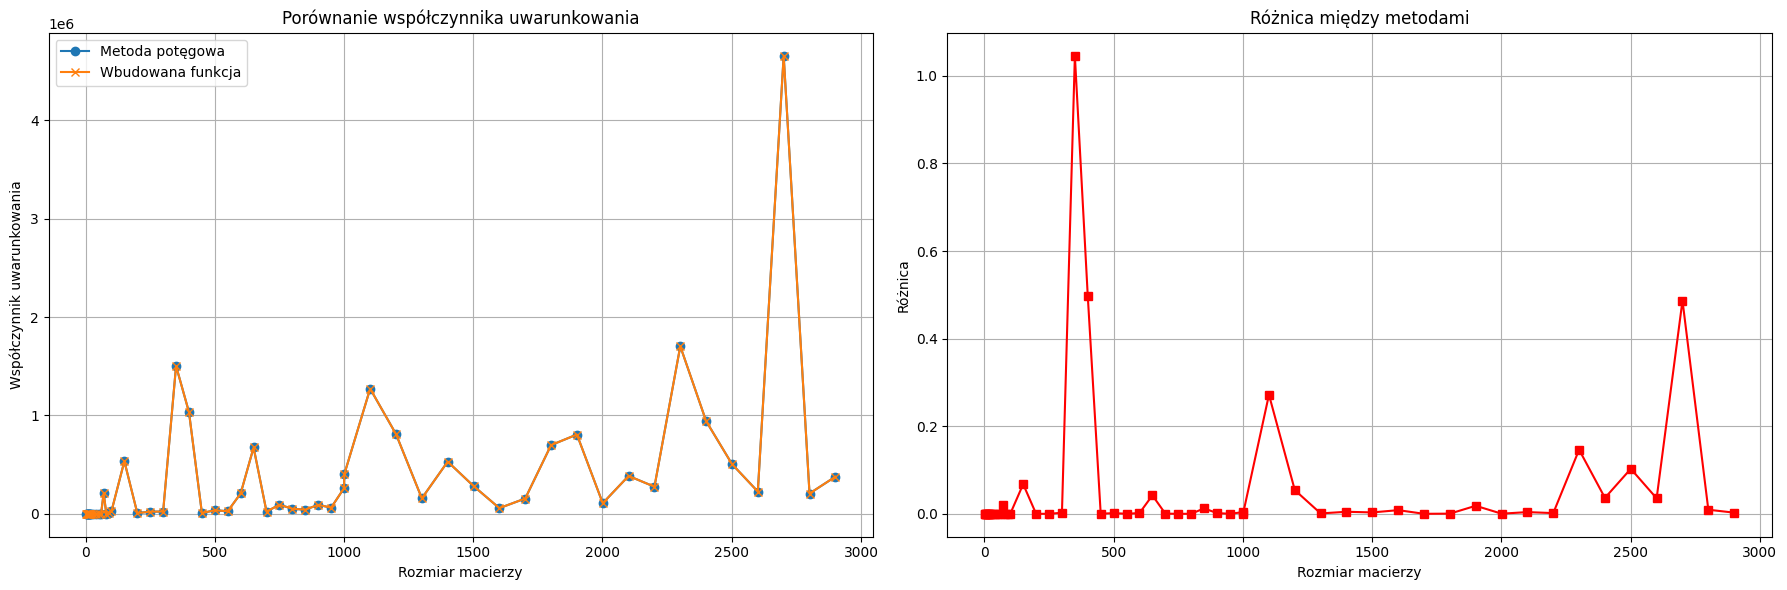

In [26]:
import matplotlib.pyplot as plt

sizes = [x for x in range(2, 21, 2)] + [x for x in range(30, 101, 10)] + [x for x in range(150, 1001, 50)] + [x for x in range(1001, 3001, 100)]
cond_powers = []
cond_builtins = []
diffs = []

for n in sizes:
    A_rand = np.random.rand(n, n)
    cond_power, cond_builtin, diff = power_method_cond(A_rand)
    cond_powers.append(cond_power)
    cond_builtins.append(cond_builtin)
    diffs.append(diff)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(sizes, cond_powers, marker='o', label='Metoda potęgowa')
axes[0].plot(sizes, cond_builtins, marker='x', label='Wbudowana funkcja')
axes[0].set_xlabel('Rozmiar macierzy')
axes[0].set_ylabel('Współczynnik uwarunkowania')
axes[0].set_title('Porównanie współczynnika uwarunkowania')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(sizes, diffs, marker='s', color='red')
axes[1].set_xlabel('Rozmiar macierzy')
axes[1].set_ylabel('Różnica')
axes[1].set_title('Różnica między metodami')
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Wnioski
Przy podanej implementacji wyniki obydwu metod są dość zbliżone.$\newline$
Wykres różnicy w wynikach metod dość blisko pokrywa się szczytami z wynikami obydwu metod, co sugerowałoby spadek dokładności obliczeń dla większych współczynników.


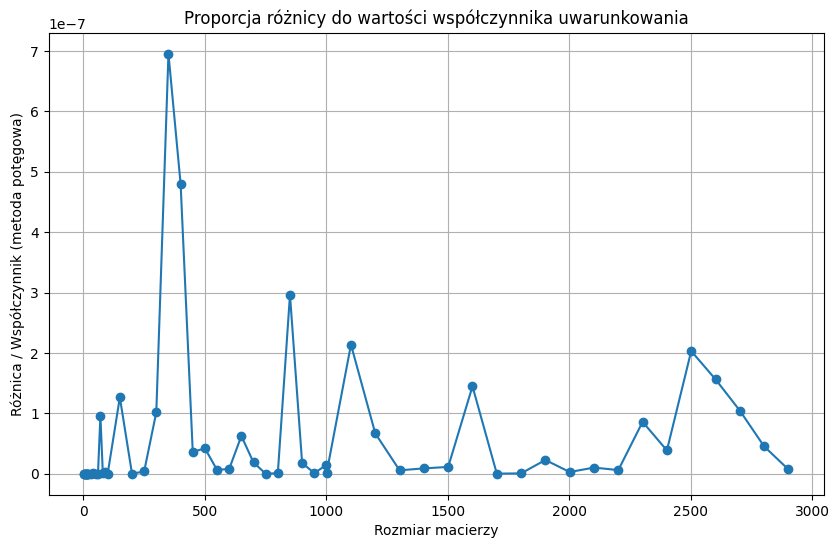

In [27]:
# Wykres proporcji różnicy do wartości współczynnika (metoda potęgowa)
proportion = [d / cp if cp != 0 else 0 for d, cp in zip(diffs, cond_powers)]

plt.figure(figsize=(10, 6))
plt.plot(sizes, proportion, marker='o')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Różnica / Współczynnik (metoda potęgowa)')
plt.title('Proporcja różnicy do wartości współczynnika uwarunkowania')
plt.grid(True)
plt.show()

Poza znacznym wzrostem różnicy w stosunku do wartości współczynnika na samym końcu zakresu wykres potwierdza istnienie większej różnicy dla współczynników o większej wartości.

## Zbadanie metod ze względu na typ macierzy

## Macierz Hilberta i blisko osobliwa

In [28]:
# Macierz Hilberta 4x4
H = np.array([[1/(i+j+1) for j in range(4)] for i in range(4)])
cond_power, cond_builtin, diff = power_method_cond(H)
print("Hilbert 4x4:")
print("Współczynnik uwarunkowania (metoda potęgowa):", cond_power)
print("Współczynnik uwarunkowania (wbudowana funkcja):", cond_builtin)
print("Różnica:", diff)

# Macierz blisko osobliwa (np. dwie bardzo podobne kolumny)
B = np.array([[1, 1, 1], [2, 2.000001, 2], [3, 3, 3.000001]])
cond_power, cond_builtin, diff = power_method_cond(B)
print("\nBlisko osobliwa 3x3:")
print("Współczynnik uwarunkowania (metoda potęgowa):", cond_power)
print("Współczynnik uwarunkowania (wbudowana funkcja):", cond_builtin)
print("Różnica:", diff)

Hilbert 4x4:
Współczynnik uwarunkowania (metoda potęgowa): 15513.738722309266
Współczynnik uwarunkowania (wbudowana funkcja): 15513.73873892924
Różnica: 1.6619973393972032e-05

Blisko osobliwa 3x3:
Współczynnik uwarunkowania (metoda potęgowa): 41206124.22333799
Współczynnik uwarunkowania (wbudowana funkcja): 41484336.60657932
Różnica: 278212.3832413256


Metoda zwraca bardzo dokładne wyniki dla macierzy Hilberta, natomiast dość mocno różni się wynik dla macierzy blisko osobliwej.

## Macierze o różnych skalach liczbowych

In [29]:
# Macierz z bardzo małymi elementami (rzędu 1e-10)
small_scale = np.array([[1e-10, 2e-10], [3e-10, 4e-10]])
cond_power_small, cond_builtin_small, diff_small = power_method_cond(small_scale)
print("Bardzo małe wartości (1e-10):")
print("Współczynnik uwarunkowania (metoda potęgowa):", cond_power_small)
print("Współczynnik uwarunkowania (wbudowana funkcja):", cond_builtin_small)
print("Różnica:", diff_small)

# Macierz z bardzo dużymi elementami (rzędu 1e+10)
large_scale = np.array([[1e+10, 2e+10], [3e+10, 4e+10]])
cond_power_large, cond_builtin_large, diff_large = power_method_cond(large_scale)
print("\nBardzo duże wartości (1e+10):")
print("Współczynnik uwarunkowania (metoda potęgowa):", cond_power_large)
print("Współczynnik uwarunkowania (wbudowana funkcja):", cond_builtin_large)
print("Różnica:", diff_large)

Bardzo małe wartości (1e-10):
Współczynnik uwarunkowania (metoda potęgowa): 14.652082027910929
Współczynnik uwarunkowania (wbudowana funkcja): 14.933034373659234
Różnica: 0.28095234574830563

Bardzo duże wartości (1e+10):
Współczynnik uwarunkowania (metoda potęgowa): 14.933034373659252
Współczynnik uwarunkowania (wbudowana funkcja): 14.933034373659261
Różnica: 8.881784197001252e-15


Dla małych wartości różnice są znacznie większe niż dla bardzo podobnej macierzy o dużych elementach.

## Sprawdzenie czy metody poprawiania wyznacznika macierzy zmniejszą różnicę

## Skalowanie

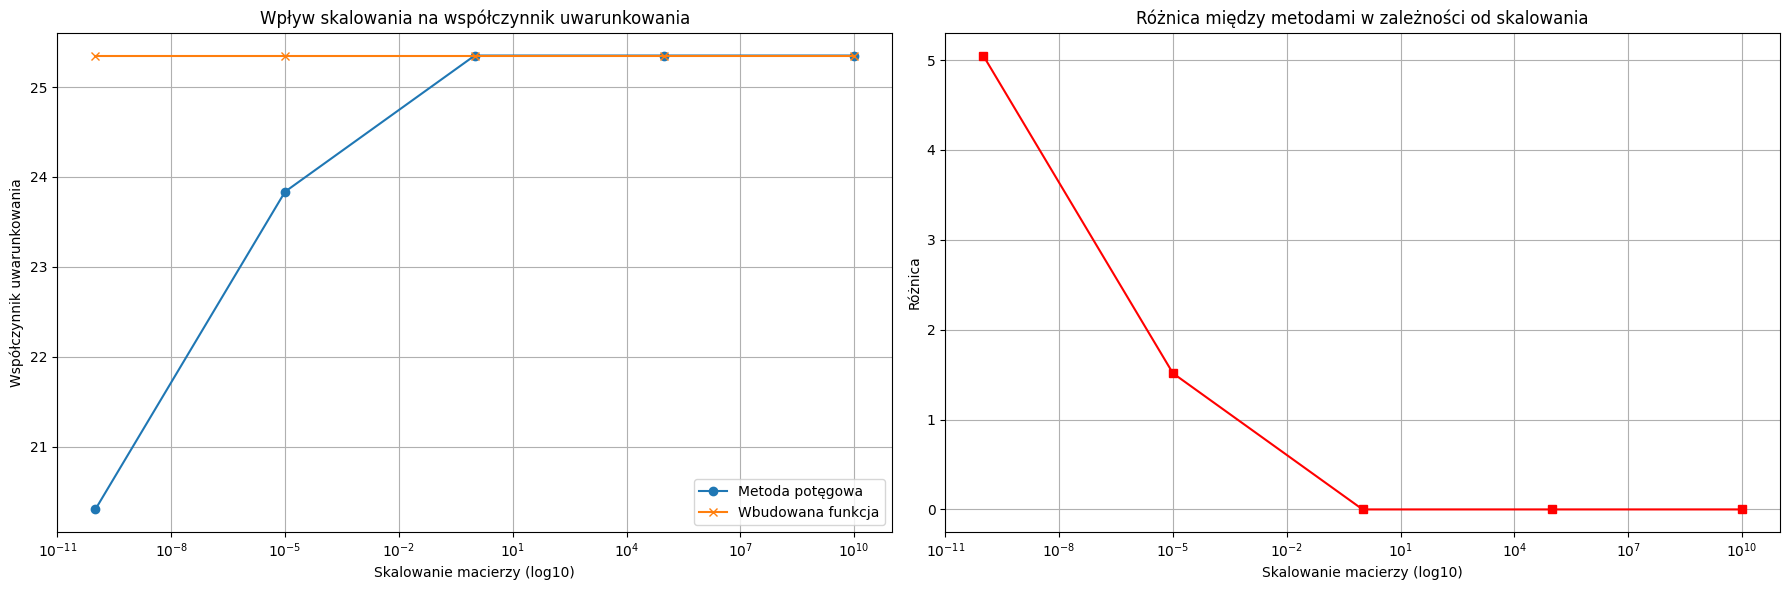

In [33]:
# Test wpływu skalowania macierzy na wyniki metody potęgowej i wbudowanej

scales = [1e-10, 1e-5, 1, 1e5, 1e10]
cond_powers_scale = []
cond_builtins_scale = []
diffs_scale = []

for s in scales:
    A_scaled = A * s
    cond_power_s, cond_builtin_s, diff_s = power_method_cond(A_scaled)
    cond_powers_scale.append(cond_power_s)
    cond_builtins_scale.append(cond_builtin_s)
    diffs_scale.append(diff_s)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(scales, cond_powers_scale, marker='o', label='Metoda potęgowa')
axes[0].plot(scales, cond_builtins_scale, marker='x', label='Wbudowana funkcja')
axes[0].set_xscale('log')
axes[0].set_xlabel('Skalowanie macierzy (log10)')
axes[0].set_ylabel('Współczynnik uwarunkowania')
axes[0].set_title('Wpływ skalowania na współczynnik uwarunkowania')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(scales, diffs_scale, marker='s', color='red')
axes[1].set_xscale('log')
axes[1].set_xlabel('Skalowanie macierzy (log10)')
axes[1].set_ylabel('Różnica')
axes[1].set_title('Różnica między metodami w zależności od skalowania')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Doszło do wyraźnego zmniejszenia różnic w wynikach przy przeskalowaniu liczbami większymi od 1, natomiast wzrostu różnic w przypadku przeskalowania w dół, co zgadzałoby się z zaobserwowanymi przedtem cechami metody potęgowej.

## Regularyzacja macierzy

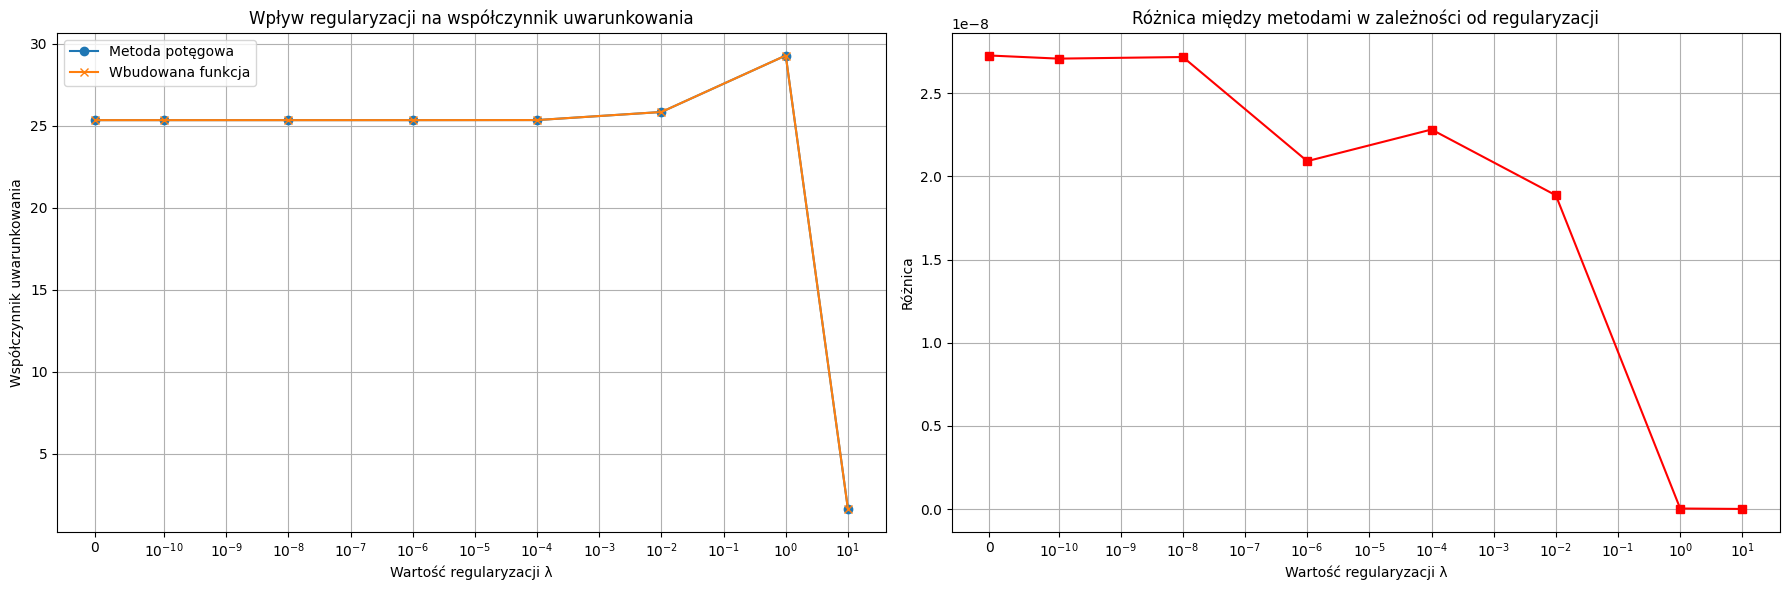

In [32]:
# Test wpływu regularyzacji macierzy na współczynnik uwarunkowania

lambdas = [0, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 10]
cond_powers_reg = []
cond_builtins_reg = []
diffs_reg = []

for lam in lambdas:
    A_reg = A + lam * np.eye(A.shape[0])
    cond_power_reg, cond_builtin_reg, diff_reg = power_method_cond(A_reg)
    cond_powers_reg.append(cond_power_reg)
    cond_builtins_reg.append(cond_builtin_reg)
    diffs_reg.append(diff_reg)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(lambdas, cond_powers_reg, marker='o', label='Metoda potęgowa')
axes[0].plot(lambdas, cond_builtins_reg, marker='x', label='Wbudowana funkcja')
axes[0].set_xscale('symlog', linthresh=1e-10)
axes[0].set_xlabel('Wartość regularyzacji λ')
axes[0].set_ylabel('Współczynnik uwarunkowania')
axes[0].set_title('Wpływ regularyzacji na współczynnik uwarunkowania')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(lambdas, diffs_reg, marker='s', color='red')
axes[1].set_xscale('symlog', linthresh=1e-10)
axes[1].set_xlabel('Wartość regularyzacji λ')
axes[1].set_ylabel('Różnica')
axes[1].set_title('Różnica między metodami w zależności od regularyzacji')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Same różnice są zawsze niewielkie, jednak wyraźny jest ich spadek dla wyższych wartości regularyzacji, oraz wzrost dla niższych wartości.